# Exploratory Analysis on a Video Game Sales Dataset

### This is a problem simulated by me and the dataset can be found at: https://www.kaggle.com/datasets/gregorut/videogamesales

## ● Dataset and Problem Description:

### *This analysis will be made for a new Game Development company, planning to develop a new game* 

### The company plans to announce and develop a new game, and the project manager wants to get insights from previous games' data, looking for what would likely bring them the best outcome.

## ● Installing the Libraries and Importing the Dataset:

In [98]:
# !pip install matplotlib
# !pip install pandas
# !pip install numpy

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
df = pd.read_csv('Data/vgsales.csv', sep=',')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [101]:
# Check if there're any rows with the same Rank
(df['Rank'].value_counts() > 1).drop_duplicates()

1    False
Name: Rank, dtype: bool

In [102]:
df = df.set_index('Rank')
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


## ● Searching for Null Values

### Null values can be a problem during the analysis, so it is important to know if there are any beforehand.

In [103]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [104]:
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


### Above, we see that some games have no release date, and because of this, I'll need to delete them. It's unfortunate, but deleting 271 records out of 16598 games is not detrimental to the analysis. (271 = 1.63% of the data)  

# ● Part 1: Global sales by Genre

### The genre is an important factor that can show us a trend regarding which games are preferred by the public.

In [105]:
global_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

genre = df['Genre'].drop_duplicates()

<BarContainer object of 12 artists>

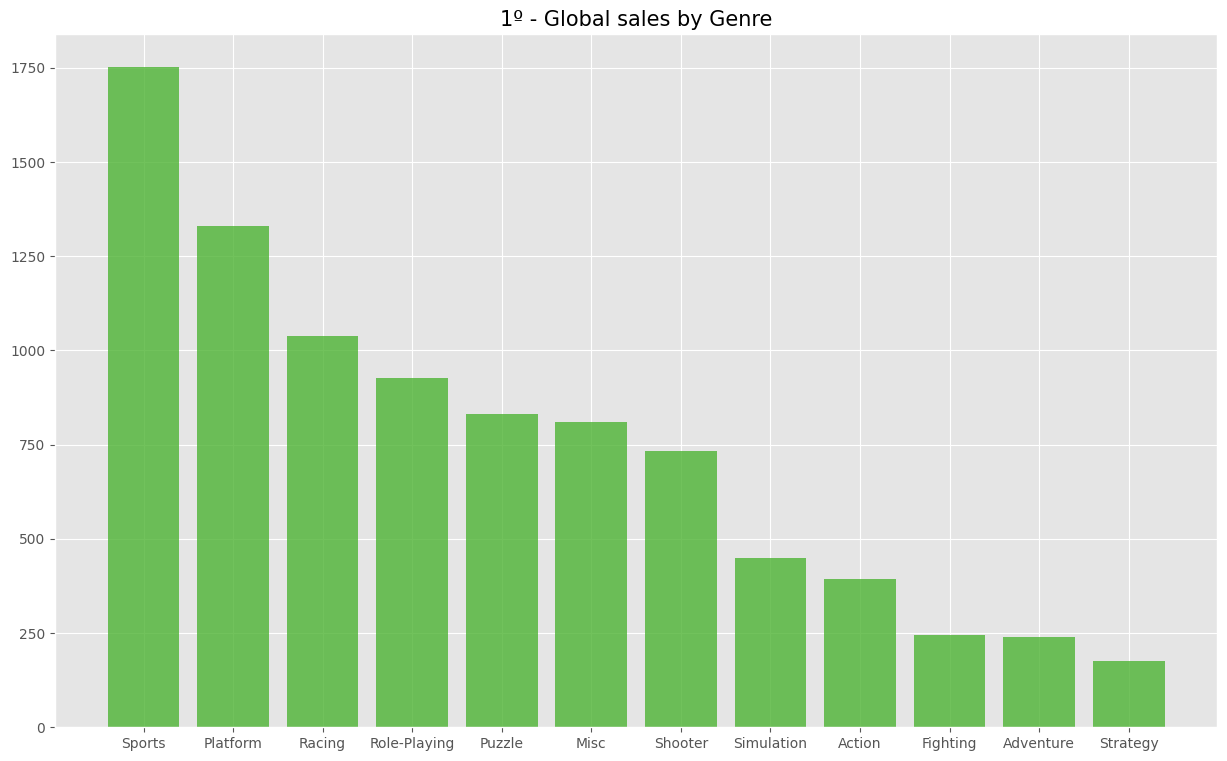

In [106]:
plt.figure(figsize=(15,9))
plt.style.use('ggplot')
plt.title('1º - Global sales by Genre', size=15)
plt.bar(genre, global_sales, color=(0.3, 0.7, 0.2, 0.8))

### Here the sales are considerably higher for the Sports genre, followed by Platform, then Racing and Role-Playing. But this could have been influenced by viral games that increased the sales in specific genres, so this data would not necessarily represent the overall trend. So let's check for outliers and if they do exist, analyze the more ordinary and less known games and their sales.

## ● Discovering the Outliers

In [107]:
np.quantile(df['Global_Sales'], 0.99)

5.430599999999976

In [108]:
(df['Global_Sales'] > 5.44).value_counts()

False    16432
True       166
Name: Global_Sales, dtype: int64

### The code above makes it visible that 99% of games have less than 5.44 million sales, which leaves only 166 games above this mark out of the total of 16598. So let's remove these outliers and remake the graphic made before without the 1% games and see if the trend changes.

## ● Removing the Outliers

In [109]:
df_no_outliers = df[(df['Global_Sales'] < 5.44)]
# plt.boxplot(global_sales_no_outliers)
df_no_outliers

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
167,Call of Duty: World at War,PS3,2008.0,Shooter,Activision,2.72,1.87,0.00,0.84,5.43
168,Crash Bandicoot: The Wrath of Cortex,PS2,2001.0,Platform,Universal Interactive,2.07,2.29,0.24,0.82,5.42
169,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
170,Final Fantasy XIII,PS3,2009.0,Role-Playing,Square Enix,1.74,1.24,1.87,0.52,5.36
171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


# ● Part 2: Global sales by Genre Without Outliers

In [110]:
global_sales_no_outliers = df_no_outliers.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

genre = df_no_outliers['Genre'].drop_duplicates()

<BarContainer object of 12 artists>

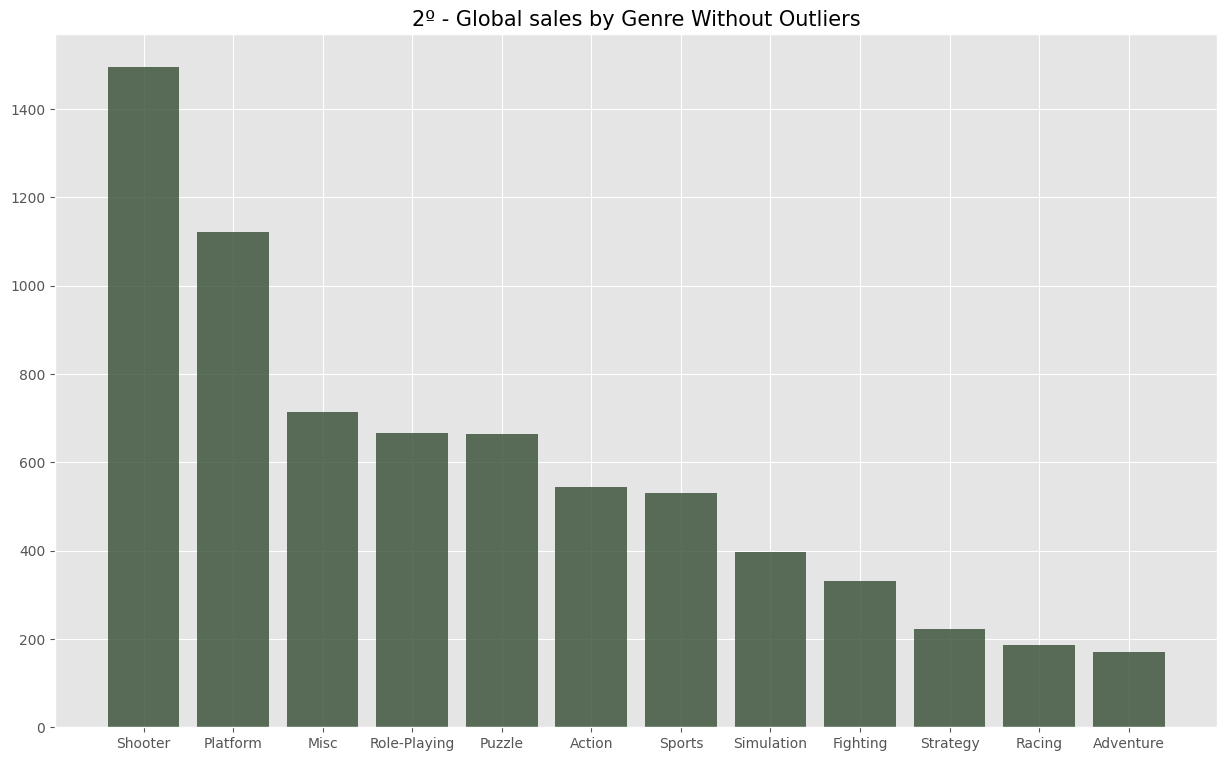

In [111]:
plt.figure(figsize=(15,9))
plt.title('2º - Global sales by Genre Without Outliers', size=15)
plt.bar(genre, global_sales_no_outliers, color=(0.2, 0.3, 0.2, 0.8))

### From this graphic, and comparing it with the one before, we can see that some famous games were indeed impactful when it comes to the sales of particular genres (especially Sports, which went down six ranks, and Racing which fell from third to almost last). But some still maintain a similar position to the one they had before, like Platform and Role-Playing.

# ● Part 3: Recent Trends

### Now we know that Platform games and Shooters are the most played ones and Misc, Role-Playing and Puzzle are well sold too though a bit behind. But investing blindly in the category with the biggest numbers can be dangerous since the market could be already overwhelmed by several games of the same genre.That being the case, the chance of our new game being successful will drastically decrease if we choose this category.

### Recent Games = 2015 - 2019

In [112]:
recent_games = df[df['Year'] >= 2015].reset_index()
recent_games.drop('Rank', axis=1, inplace=True)
recent_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
1,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
2,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
3,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
4,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
...,...,...,...,...,...,...,...,...,...,...
957,Teslagrad,PSV,2015.0,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01
958,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
959,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
960,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


In [113]:
recent_genres = df['Genre'].unique()
values = [len(recent_games[recent_games['Genre'] == x]) for x in recent_genres]

<BarContainer object of 12 artists>

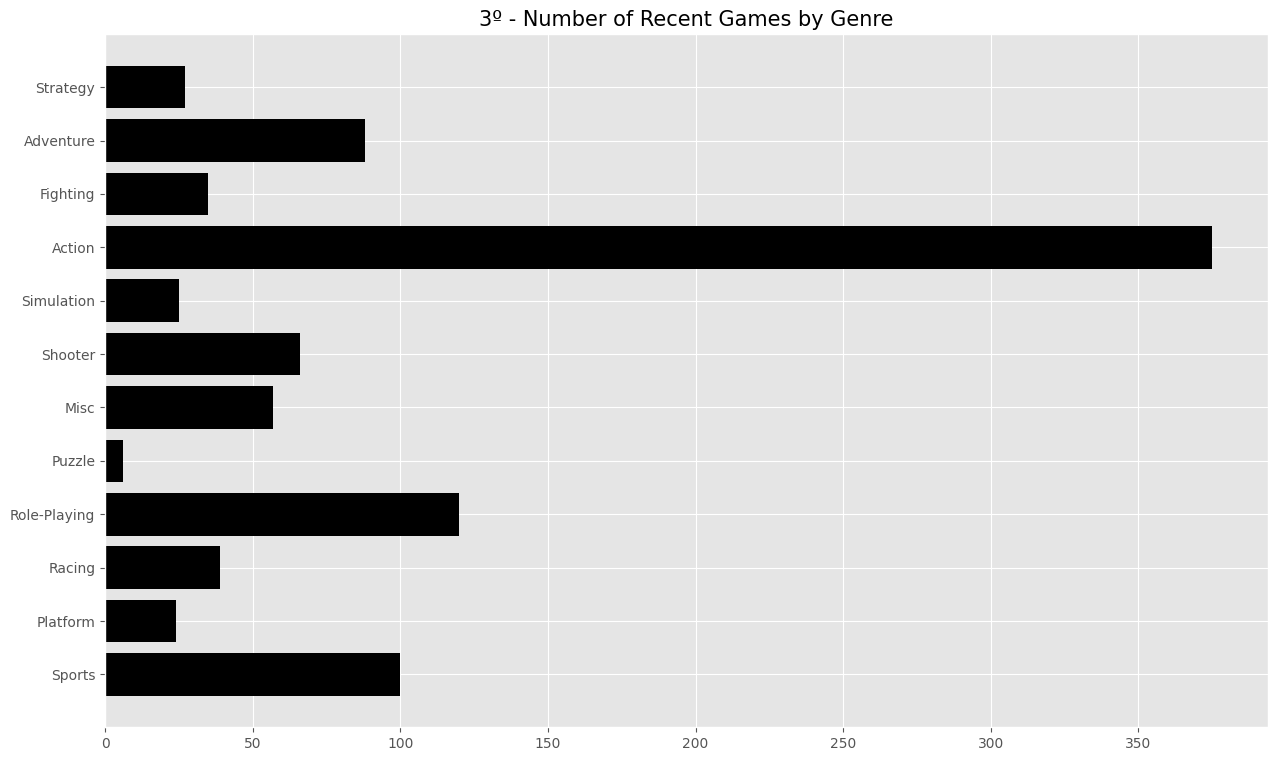

In [114]:
plt.figure(figsize=(15,9))
plt.title('3º - Number of Recent Games by Genre', size=15)
plt.barh(recent_genres, values, color='black')

### This graphic shows that Action, Role-Playing, Sports and Adventure are already receiving too much supply. Shooter and Misc are also high in quantity, while Platform and Puzzle are the least in number of recent games on the market.

In [115]:
df = df[df['Year'].notnull()]

platform_games = df[df['Genre'] == 'Platform']['Year'].value_counts()
number_platform_games = platform_games.values
years = platform_games.index

<BarContainer object of 36 artists>

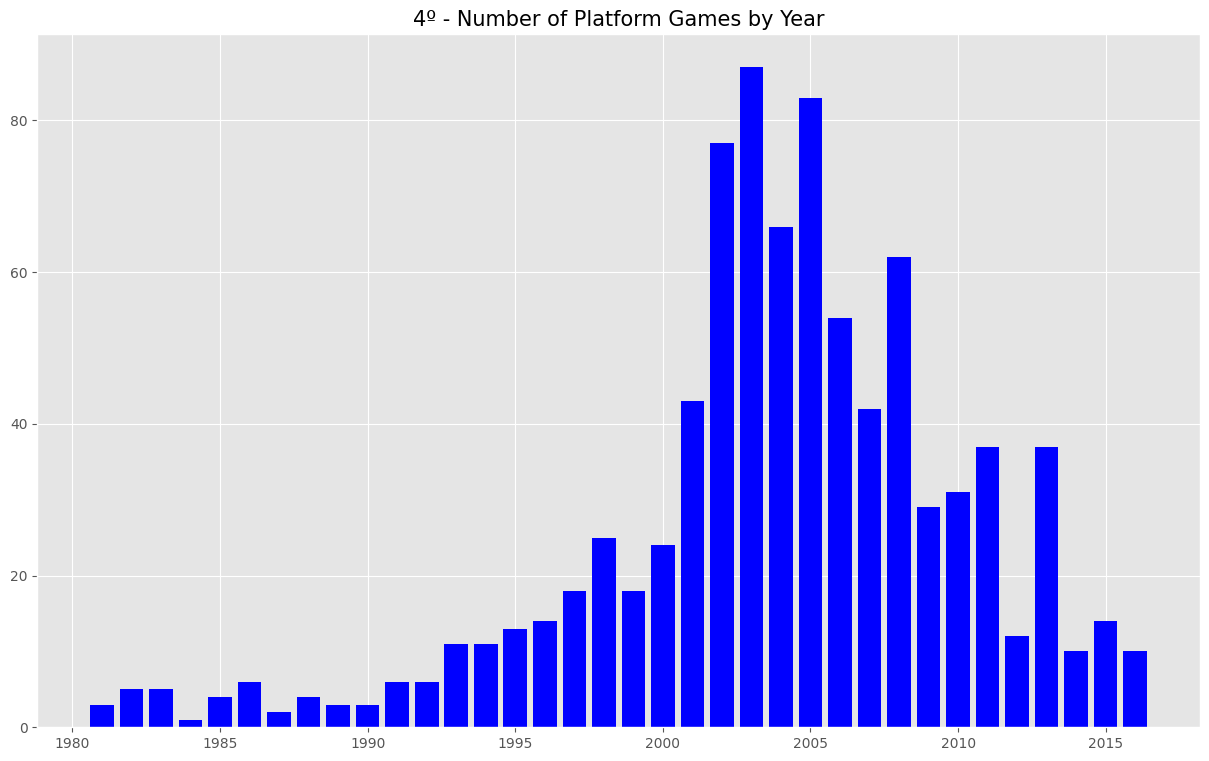

In [116]:
plt.figure(figsize=(15,9))
plt.title('4º - Number of Platform Games by Year', size=15)
plt.bar(years, number_platform_games, color='blue')

In [117]:
shooter_games = df[df['Genre'] == 'Shooter']['Year'].value_counts()
number_shooter_games = shooter_games.values
years = shooter_games.index

<BarContainer object of 36 artists>

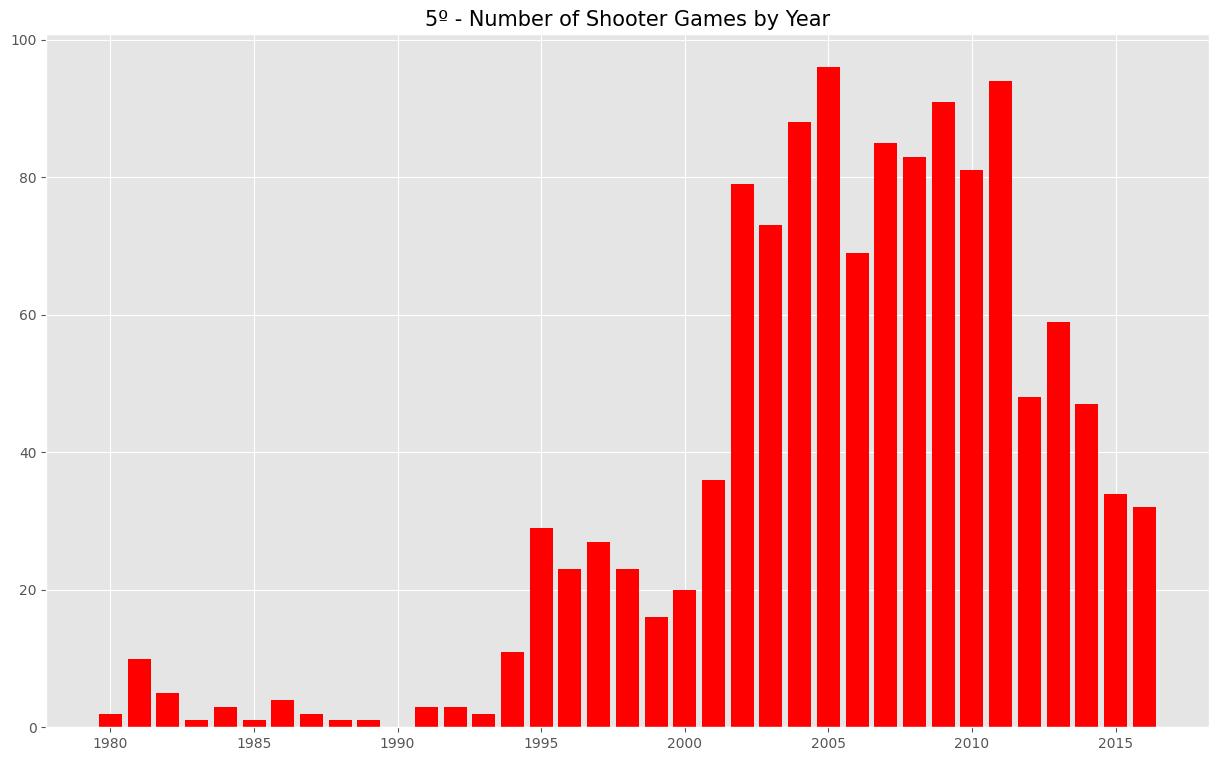

In [118]:
plt.figure(figsize=(15,9))
plt.title('5º - Number of Shooter Games by Year', size=15)
plt.bar(years, number_shooter_games, color='red')

# ● Conclusion

## Looking at Graphs One and Two, it's possible to define the winners, Platform and Shooter, yet we see very different behaviors from the two genres: while the Shooters came from seventh to first, when the outliers were discarded, the Platform games kept the second position. It could mean that even though shooters might be more sold (because of the extra supply shown by Graph Three), the Platform genre has a higher chance of becoming viral and having massive sales.

## As said earlier, the number of Shooter games is larger, and despite the  dangers of higher competition, we should also consider that Shooters are replaced faster than Platforms, which opens the possibility for our game, if a Shooter, to grow. 


## But Graph Four and Five give another insight: the number of Platform games has been only decreasing over the years, having in 2014/2016 the highest low in 30+ years, so it's a great opportunity to explore a gap in the market. And while the investment in Shooters also declined recently, it's still almost three times higher.

## Another interesting piece of info we can get out of these graphs is the Puzzle genre: although not the strongest in sales, it is a niche with almost no investment, as seen in Graph Three but still managed to stay in the middle of the charts One and Two, showing that this genre could contribute well as a smaller project of the company.

## In conclusion, investing in a Platform game seems like the best option, considering the sales stability this category showed (number of sales with and without outliers) and the understock of new Platform games. Also, if the company wants to work on a side project or a mobile game, the Puzzle genre would be a great option.